<a href="https://colab.research.google.com/github/shivangtripathi/ml_lab/blob/main/ml_asg5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quesetion 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




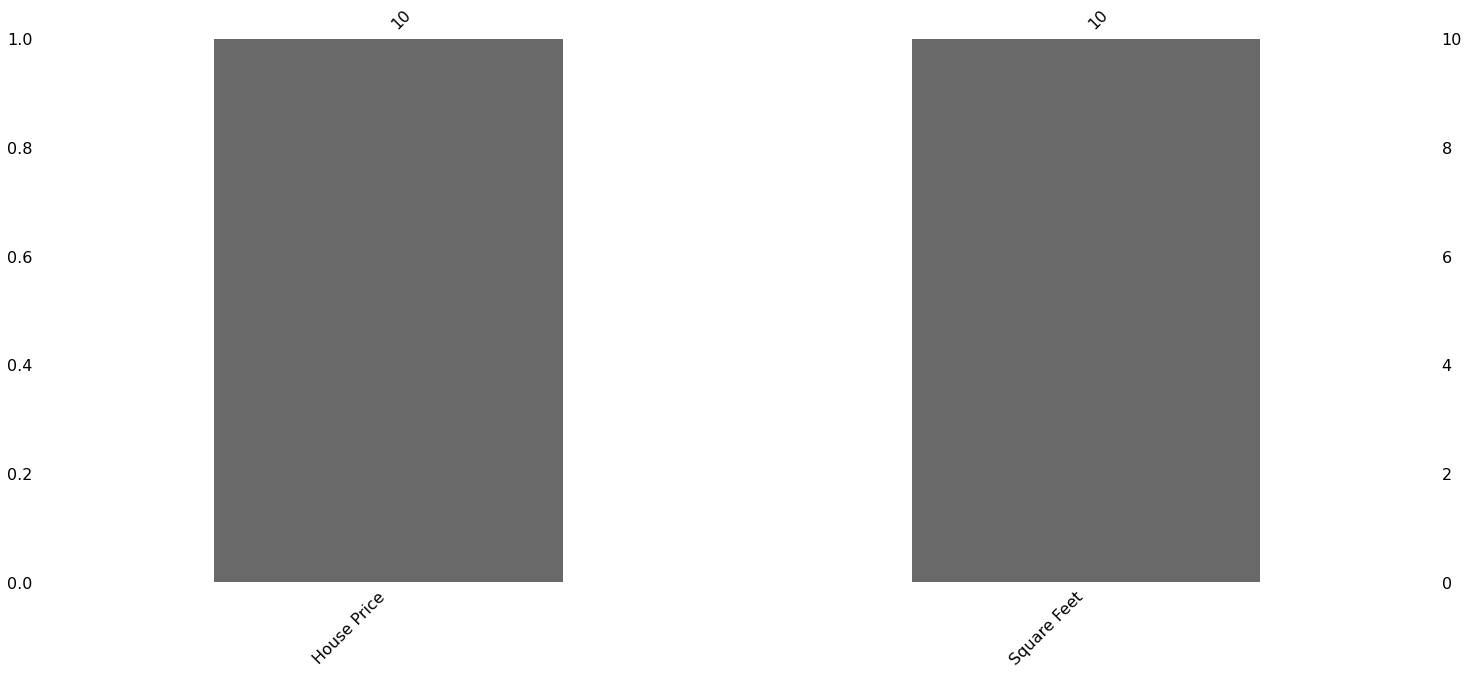

In [ ]:
df = pd.read_csv('./dataset.csv')
#checking missing values in dataframe
import missingno as ms
ms.bar(df)

In [ ]:
## as all the bars are completed to 10 units so there is no missing values in the dataset


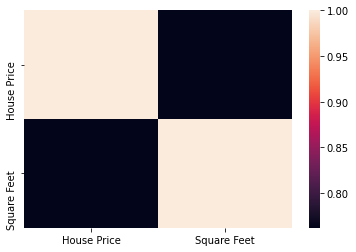

In [ ]:
#checking redudancy
sns.heatmap(df.iloc[:,0:2].corr())

In [ ]:
#Splitting features

X = df.iloc[:,0:1]
Y = df.iloc[:,1]

Y = np.array(Y)
Y = Y.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled = np.insert(X_Scaled,0,values=1,axis=1)



In [ ]:
#splitting dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_Scaled,Y,test_size = 0.3,random_state=12)



In [ ]:
#finding regression
A = X_train.T.dot(X_train)
B = np.linalg.inv(A)
C = B.dot(X_train.T)
beta = C.dot(Y_train)




In [ ]:
beta

array([[1676.99821574],
       [ 319.4570948 ]])

In [ ]:
y_predict = X_test.dot(beta)

In [ ]:
#predicting on given value
X_Scaled = scaler.fit_transform(X)
X_Scaled = np.insert(X_Scaled,0,values=1,axis=1)
y_predict = [3000]*beta

In [ ]:
y_predict

array([[17878.50221988]])

## Question 2

In [4]:
df2 = pd.read_csv("./Stock_Index_dataset.csv")
df2.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [6]:
df2['date'] = (df2['Year'] - 1)*12 + df2['Month']
df2.drop(['Year', 'Month'], inplace=True, axis=1)
df2.head()

,Interest_Rate,Unemployment_Rate,Stock_Index_Price,date
0,2.75,5.3,1464,24204
1,2.50,5.3,1394,24203
2,2.50,5.3,1357,24202
3,2.50,5.3,1293,24201
4,2.50,5.4,1256,24200


In [8]:
X, y = df2.iloc[:,[0,1,3]], df2['Stock_Index_Price']
X.head()

,Interest_Rate,Unemployment_Rate,date
0,2.75,5.3,24204
1,2.50,5.3,24203
2,2.50,5.3,24202
3,2.50,5.3,24201
4,2.50,5.4,24200


In [9]:
X = np.array(X)

In [10]:
X_np = np.insert(X, 0, 1, axis=1)

In [11]:
X_np

array([[1.0000e+00, 2.7500e+00, 5.3000e+00, 2.4204e+04],
       [1.0000e+00, 2.5000e+00, 5.3000e+00, 2.4203e+04],
       [1.0000e+00, 2.5000e+00, 5.3000e+00, 2.4202e+04],
       [1.0000e+00, 2.5000e+00, 5.3000e+00, 2.4201e+04],
       [1.0000e+00, 2.5000e+00, 5.4000e+00, 2.4200e+04],
       [1.0000e+00, 2.5000e+00, 5.6000e+00, 2.4199e+04],
       [1.0000e+00, 2.5000e+00, 5.5000e+00, 2.4198e+04],
       [1.0000e+00, 2.2500e+00, 5.5000e+00, 2.4197e+04],
       [1.0000e+00, 2.2500e+00, 5.5000e+00, 2.4196e+04],
       [1.0000e+00, 2.2500e+00, 5.6000e+00, 2.4195e+04],
       [1.0000e+00, 2.0000e+00, 5.7000e+00, 2.4194e+04],
       [1.0000e+00, 2.0000e+00, 5.9000e+00, 2.4193e+04],
       [1.0000e+00, 2.0000e+00, 6.0000e+00, 2.4192e+04],
       [1.0000e+00, 1.7500e+00, 5.9000e+00, 2.4191e+04],
       [1.0000e+00, 1.7500e+00, 5.8000e+00, 2.4190e+04],
       [1.0000e+00, 1.7500e+00, 6.1000e+00, 2.4189e+04],
       [1.0000e+00, 1.7500e+00, 6.2000e+00, 2.4188e+04],
       [1.0000e+00, 1.7500e+00,

In [13]:
L = X_np.T.dot(X_np)
print(L)
invL = np.linalg.inv(L)
beta = invL.dot(X_np.T).dot(y)

[[2.40000000e+01 4.97500000e+01 1.38600000e+02 5.80620000e+05]
 [4.97500000e+01 1.05937500e+02 2.84850000e+02 1.20363000e+06]
 [1.38600000e+02 2.84850000e+02 8.02920000e+02 3.35303030e+06]
 [5.80620000e+05 1.20363000e+06 3.35303030e+06 1.40466505e+10]]


In [14]:
beta

array([-6.73495867e+05,  7.46843500e+01,  4.27147149e+01,  2.78666718e+01])

In [15]:
x_test = [1, 1.5, 5.8, 2021*12]
x_test = np.array(x_test)

In [16]:
x_test.dot(beta.T)

2686.43026952417